# DDoS Detection using Federated and Ensemble Learning- an Analysis study



### SVM

In [48]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [50]:
df=pd.read_csv('final.csv')

In [51]:
df=df[:17000]

In [52]:
df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,tcp,1540.0,-------,4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196.0,23.0,24.0,tcp,1540.0,-------,16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905.0,23.0,22.0,ack,55.0,-------,16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135.0,23.0,21.0,ack,55.0,-------,10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335.0,23.0,21.0,ack,55.0,-------,9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


In [53]:
df.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object')

In [54]:
df=df.drop(['FLAGS'],axis=1)

In [55]:
print(df['PKT_TYPE'].unique())
print(df['NODE_NAME_FROM'].unique())
print(df['NODE_NAME_TO'].unique())

['tcp' 'ack' 'cbr' 'ping']
['Switch1' 'Router' 'server1' 'router' 'clien-4' 'client-2' 'Switch2'
 'client-5' 'clien-9' 'clien-2' 'clien-1' 'clien-14' 'clien-5' 'clien-11'
 'clien-13' 'clien-0' 'switch1' 'client-4' 'clienthttp' 'clien-7'
 'clien-19' 'client-14' 'clien-12' 'clien-8' 'clien-15' 'webserverlistin'
 'client-18' 'client-1' 'switch2' 'clien-6' 'client-10' 'client-7'
 'webcache' 'clien-10' 'client-15' 'clien-3' 'client-17' 'client-16'
 'clien-17' 'clien-18' 'client-12' 'client-8' 'client-0' 'clien-16'
 'client-13' 'client-11' 'client-6' 'client-3' 'client-9' 'client-19'
 'http_client']
['Router' 'server1' 'Switch2' 'Switch1' 'clien-1' 'clien-5' 'clien-7'
 'switch1' 'clien-11' 'clien-15' 'clien-13' 'clien-3' 'clien-9' 'clien-6'
 'router' 'clien-4' 'clien-14' 'switch2' 'clien-8' 'clienthttp' 'webcache'
 'clien-10' 'clien-12' 'webserverlistin' 'clien-0' 'clien-2' 'http_client'
 'client-13' 'client-9' 'client-1' 'client-19' 'client-4' 'client-17'
 'client-7' 'client-3' 'client-12' 

In [56]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [57]:
df['PKT_TYPE']=label_encoder.fit_transform(df['PKT_TYPE'])
df['NODE_NAME_TO']=label_encoder.fit_transform(df['NODE_NAME_TO'])
df['NODE_NAME_FROM']=label_encoder.fit_transform(df['NODE_NAME_FROM'])
print(df['PKT_TYPE'].unique())
print(df['NODE_NAME_FROM'].unique())
print(df['NODE_NAME_TO'].unique())

[3 0 1 2]
[ 1  0 46 45 17 35  2 38 22 15  4  9 18  6  8  3 47 37 43 20 14 29  7 21
 10 50 33 24 48 19 25 40 49  5 30 16 32 31 12 13 27 41 23 11 28 26 39 36
 42 34 44]
[ 0 36  2  1  4 16 18 37  6 10  8 14 20 17 35 15  9 38 19 33 39  5  7 40
  3 13 34 24 32 22 27 30 26 31 29 23 28 12 25 11 21]


In [58]:
X=df.drop(['PKT_CLASS'],axis=1)
Y=df['PKT_CLASS']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [60]:
X_train.shape, X_test.shape

((13600, 26), (3400, 26))

In [61]:
cols = X_train.columns

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [64]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [65]:
X_train.describe()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
count,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,...,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04,1.360000e+04
mean,-1.567374e-17,1.859950e-16,1.123284e-16,-1.201653e-17,-3.103400e-16,2.638412e-17,-1.462882e-17,4.728244e-17,-1.306145e-17,-2.371959e-16,...,4.702121e-18,2.925764e-17,-9.874454e-17,-1.201653e-17,-4.832736e-17,-3.317608e-17,9.456488e-17,-2.680209e-16,-2.821273e-17,3.824392e-16
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,...,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.662032e+00,-2.104149e+00,-1.494822e+00,-3.140034e+00,-3.946221e+00,-1.050602e+00,-2.768902e-01,-1.258574e+00,-1.356889e-01,-3.155837e+00,...,-1.183788e-01,-1.598638e+00,-8.293557e-01,-2.768892e-01,-1.069535e+00,-2.873444e-01,-1.743890e+00,-1.739009e+00,-5.653675e-01,-2.558804e+00
25%,-8.635859e-01,-9.410505e-01,-9.552486e-01,2.166570e-01,3.289458e-02,-1.050602e+00,-2.768902e-01,-8.012483e-01,-1.166937e-01,-1.033783e+00,...,-1.183788e-01,-7.323028e-02,-7.833612e-01,-2.768892e-01,-9.861112e-01,-2.873444e-01,-8.098814e-01,-8.099669e-01,-4.545582e-01,-4.703586e-02
50%,-6.514017e-02,7.024070e-01,-3.547220e-02,3.764995e-01,4.118580e-01,-2.897826e-01,-2.561897e-02,-2.524573e-01,-9.153554e-02,6.016100e-01,...,-1.183788e-01,-7.274172e-02,-5.102965e-01,-2.561858e-02,-4.789478e-01,-2.873444e-01,-2.190810e-02,-2.151032e-02,-4.512322e-01,-4.571752e-02
75%,1.090325e+00,7.291582e-01,8.641131e-01,5.363419e-01,4.118580e-01,1.231856e+00,1.179646e-01,3.877988e-01,-5.142561e-02,6.018442e-01,...,-1.183788e-01,-7.161271e-02,4.619934e-01,1.179646e-01,1.272750e+00,-2.490552e-01,6.976824e-01,6.974695e-01,-4.512283e-01,-4.470322e-02
max,1.303624e+00,9.199063e-01,1.796440e+00,1.015869e+00,9.803031e-01,1.231856e+00,1.713394e+01,2.400032e+00,2.334399e+01,6.044204e-01,...,1.340393e+01,3.611256e+00,3.455875e+00,1.713396e+01,1.274505e+00,7.501248e+00,2.483562e+00,2.485486e+00,2.204864e+00,1.545364e+00


In [66]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(probability=True) 


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters for SVM: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with default hyperparameters for SVM: 0.9847


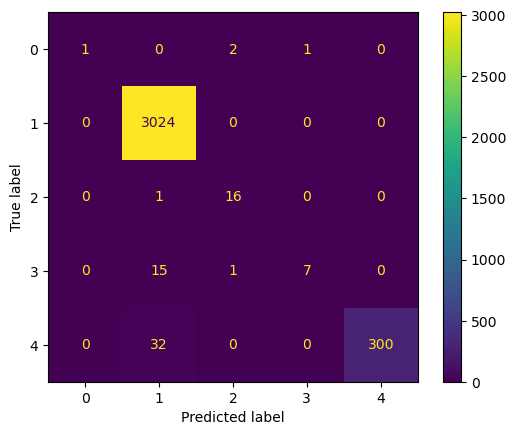

In [68]:
confusion_matrix1 = metrics.confusion_matrix(Y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix1)
cm_display.plot()

### Cat-Boost

In [69]:
cat_features=np.where(X.dtypes !=np.float)[0]

C:\Users\Acer\AppData\Local\Temp\ipykernel_11656\984827072.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features=np.where(X.dtypes !=np.float)[0]


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [82]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

In [83]:
clf.fit(X_train, Y_train,  
        cat_features=cat_features,
        eval_set=(X_test, Y_test), 
        verbose=False
)

In [84]:
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [85]:
y_pred = clf.predict(X_test)

In [86]:
print('Model accuracy score with default hyperparameters for CatBoost: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters for CatBoost: 0.9797


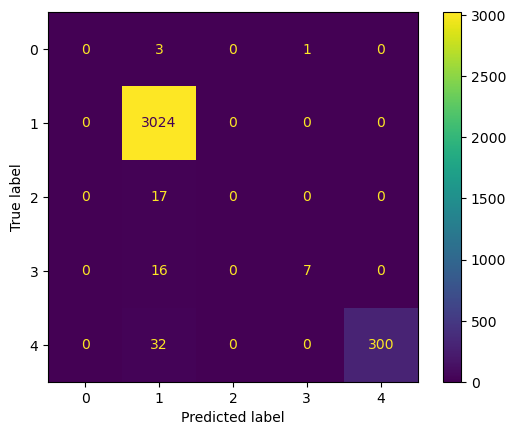

In [87]:
confusion_matrix2 = metrics.confusion_matrix(Y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix2)
cm_display.plot()

In [76]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)


In [77]:
clf.fit(
    X_train, Y_train,
    cat_features=cat_features,
    eval_set=(X_test, Y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [78]:
print(clf.predict_proba(X_test))

[[9.32065298e-04 9.85379294e-01 1.09605141e-03 4.45491190e-03
  8.13767743e-03]
 [1.40542969e-03 9.79593951e-01 1.74442890e-03 4.60944864e-03
  1.26467419e-02]
 [1.26848918e-03 9.85568059e-01 1.75184304e-03 4.03082703e-03
  7.38078159e-03]
 ...
 [9.01868443e-04 9.86233608e-01 1.01068591e-03 3.36137882e-03
  8.49245866e-03]
 [8.80028466e-04 9.83855263e-01 1.01183106e-03 3.76877177e-03
  1.04841055e-02]
 [9.34202519e-04 9.85297657e-01 1.18668594e-03 3.17036963e-03
  9.41108529e-03]]


In [79]:
print(clf.predict(X_test))

[['Normal']
 ['Normal']
 ['Normal']
 ...
 ['Normal']
 ['Normal']
 ['Normal']]


In [80]:
clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

In [31]:
clf.fit(
    X_train, Y_train,
    cat_features=cat_features,
    eval_set=(X_test, Y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [35]:
print('Model accuracy score with default hyperparameters for Logistic Regression: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters for Logistic Regression: 0.9741


### Voting ensemble


In [36]:
def get_models():
    models=list()
    models.append(('svm', SVC(probability=True)))
    models.append(('catboost', CatBoostClassifier()))
    models.append(('lr', LogisticRegression()))
    return models

In [37]:
def evaluate_models(models, X_train, X_val, Y_train, Y_val):
    scores=list()
    for name, model in models:
        model.fit(X_train, Y_train)
        yhat= model.predict(X_val)
        acc=accuracy_score(Y_val, yhat)
        scores.append(acc)
    return scores

In [38]:
models= get_models()

In [39]:
scores=evaluate_models(models, X_train, X_test, Y_train, Y_test)

Learning rate set to 0.090393
0:	learn: 1.2877957	total: 9.64ms	remaining: 9.63s
1:	learn: 1.0767632	total: 13.8ms	remaining: 6.9s
2:	learn: 0.9223654	total: 22.7ms	remaining: 7.55s
3:	learn: 0.8018182	total: 31.9ms	remaining: 7.95s
4:	learn: 0.7056538	total: 40.1ms	remaining: 7.97s
5:	learn: 0.6275717	total: 49.3ms	remaining: 8.17s
6:	learn: 0.5611758	total: 57.7ms	remaining: 8.18s
7:	learn: 0.5048241	total: 67.3ms	remaining: 8.35s
8:	learn: 0.4563305	total: 77.6ms	remaining: 8.55s
9:	learn: 0.4140284	total: 86.5ms	remaining: 8.56s
10:	learn: 0.3774714	total: 96.1ms	remaining: 8.64s
11:	learn: 0.3452244	total: 106ms	remaining: 8.69s
12:	learn: 0.3167085	total: 114ms	remaining: 8.69s
13:	learn: 0.2915040	total: 124ms	remaining: 8.72s
14:	learn: 0.2691196	total: 132ms	remaining: 8.7s
15:	learn: 0.2495054	total: 142ms	remaining: 8.73s
16:	learn: 0.2318265	total: 150ms	remaining: 8.68s
17:	learn: 0.2158678	total: 160ms	remaining: 8.71s
18:	learn: 0.2017997	total: 169ms	remaining: 8.72s
19

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)

In [41]:
ensemble.fit(X_train, Y_train)

Learning rate set to 0.090393
0:	learn: 1.2877957	total: 9.86ms	remaining: 9.85s
1:	learn: 1.0767632	total: 14.8ms	remaining: 7.4s
2:	learn: 0.9223654	total: 23.5ms	remaining: 7.82s
3:	learn: 0.8018182	total: 32.3ms	remaining: 8.03s
4:	learn: 0.7056538	total: 40.8ms	remaining: 8.11s
5:	learn: 0.6275717	total: 49.8ms	remaining: 8.25s
6:	learn: 0.5611758	total: 58ms	remaining: 8.23s
7:	learn: 0.5048241	total: 66.7ms	remaining: 8.27s
8:	learn: 0.4563305	total: 75.7ms	remaining: 8.33s
9:	learn: 0.4140284	total: 84ms	remaining: 8.31s
10:	learn: 0.3774714	total: 93.2ms	remaining: 8.38s
11:	learn: 0.3452244	total: 102ms	remaining: 8.39s
12:	learn: 0.3167085	total: 110ms	remaining: 8.37s
13:	learn: 0.2915040	total: 119ms	remaining: 8.39s
14:	learn: 0.2691196	total: 128ms	remaining: 8.44s
15:	learn: 0.2495054	total: 138ms	remaining: 8.48s
16:	learn: 0.2318265	total: 146ms	remaining: 8.47s
17:	learn: 0.2158678	total: 156ms	remaining: 8.49s
18:	learn: 0.2017997	total: 165ms	remaining: 8.52s
19:	l

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x0000016E74F57460>),
                             ('lr', LogisticRegression())],
                 voting='soft',
                 weights=[0.9661764705882353, 0.9847058823529412,
                          0.9741176470588235])

In [42]:
yhat=ensemble.predict(X_test)

In [43]:
score = accuracy_score(Y_test, yhat)
print('Weighted Avg Accuracy of Voting Ensemble: %.3f' % (score*100))

Weighted Avg Accuracy of Voting Ensemble: 98.000


In [44]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [45]:
confusion_matrix = metrics.confusion_matrix(Y_test, yhat)

In [46]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix)

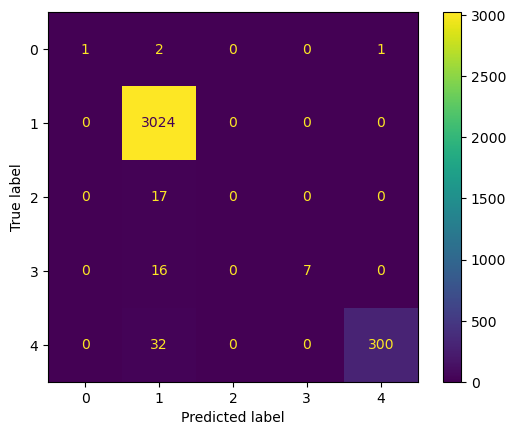

In [47]:
cm_display.plot()